In [212]:
import pandas as pd
from datetime import datetime
import numpy as np

In [236]:
from imblearn.over_sampling import SMOTE

In [301]:
coplay = pd.read_csv("/mnt/data/ds_data/SHARED_RESOURCES/NETWORK_DATA_YEARS/Grouped_Jan2017-Feb2019.csv")

In [305]:
coplay_file.head()

,SPA1,SPA2,BATTLE_CNT
0,00001DD103717A29AE6EAF27BC0E5DD8E03F0CAD177F2A...,0048E013B0F7958ACC52E538699ED1DE84D18E2B9620E9...,1
1,00001DD103717A29AE6EAF27BC0E5DD8E03F0CAD177F2A...,00DF9BA062D72A54D3C5688ED684078920922BC2583BA8...,1
2,00001DD103717A29AE6EAF27BC0E5DD8E03F0CAD177F2A...,0163ACCE4D7BA391CE6AF4610543DA424093A9B1AC3809...,1
3,00001DD103717A29AE6EAF27BC0E5DD8E03F0CAD177F2A...,0228B07CF15F38B83A42531AB6466F47D8029836AE520B...,1
4,00001DD103717A29AE6EAF27BC0E5DD8E03F0CAD177F2A...,03ED9339DF838206FE3788035FEB3CB864E37A56D2F943...,1


In [303]:
coplay_file = coplay.groupby(['SPA1','SPA2'])['BATTLE_CNT'].sum().reset_index()

In [79]:
coplay_agg = coplay_file.groupby(['SPA1']).agg({"SPA2": "count"}).reset_index()

In [81]:
coplay_agg2 = coplay_file.groupby(['SPA2']).agg({"SPA1": "count"}).reset_index()

In [84]:
coplay_agg.columns = ['SPA', 'Coplay_count'] 
coplay_agg2.columns = ['SPA', 'Coplay_count'] 

In [85]:
coplay_data = pd.concat([coplay_agg, coplay_agg2]).groupby(["SPA"], as_index=False)["Coplay_count"].sum()

In [336]:
coplay_data.head()

,SPA,Coplay_count
0,00001DD103717A29AE6EAF27BC0E5DD8E03F0CAD177F2A...,66
1,00003C737E6C04AB485320F2EE39F3DEF153CA065B303F...,2
2,000057AAF844EE943845732F1E2C512BF0B26DBB2B70BD...,3
3,00008E03280B09D31452D8A5BACD54B565394A283EB34C...,41
4,0000BC1E957A5DE86D6742F0304DD12F6C5B53BEE1A67B...,5


In [64]:
survey_file = pd.read_csv("/mnt/data/ds_data/SHARED_RESOURCES/updated_second_batch.csv", encoding='latin-1')

In [65]:
survey_file = survey_file.iloc[:,[1,4,5,6,7,10]]

In [87]:
survey_file.shape

(1239146, 4)

In [67]:
survey_file['month_id']= pd.to_datetime(survey_file['month_id'])

In [68]:
survey_file = survey_file.set_index('month_id')


In [69]:
survey_file = survey_file['2017-01-01':'2019-02-28']

In [70]:
survey_file.reset_index(drop=True, inplace=True)

In [71]:
survey_file = survey_file.groupby(['spa_key_sha256']).agg({"bttl_total_cnt": "sum", "bttl_wins_cnt": "sum","max_tier_used_mm": "max","global_rating": "max"})

In [88]:
#to be used later = 268,684 entries
merged_files = pd.merge(survey_file, coplay_data, how='inner', left_on="spa_key_sha256", right_on="SPA")

In [117]:
join_features = survey_file.join(coplay_data.set_index('SPA'), on='spa_key_sha256')

In [118]:
coplay_mean = coplay_data['Coplay_count'].mean()
join_features['Coplay_count'] = join_features['Coplay_count'].fillna(coplay_mean)

In [119]:
join_features['Coplay_count'] = join_features['Coplay_count'].round()

In [121]:
join_features.reset_index(inplace=True)

In [168]:
join_features.head()

,spa_key_sha256,bttl_total_cnt,bttl_wins_cnt,max_tier_used_mm,global_rating,Coplay_count,sybil_status
0,00000714D508E2E8920AB7F66B9566D46172A02EA50BD7...,18,9,3,74,72.0,0.0
1,00001DD103717A29AE6EAF27BC0E5DD8E03F0CAD177F2A...,7460,3656,10,4574,66.0,1.0
2,000024EA5B64414688664675D362C6B609CF422AF4F2F3...,27,12,5,2421,72.0,0.0
3,0000290505D808A4E9F8829E118E1546DBF6FD65B7F502...,3,2,4,1235,72.0,0.0
4,00002A428C3F8EA6D46AC382DC935D41EBD8E578BCD5CB...,23,9,2,157,72.0,0.0


In [111]:
twinks_file = pd.read_csv("/mnt/data/ds_data/SHARED_RESOURCES/TWINK_DATA/twinks_new.csv")

In [317]:
twinks_file.head()

,Unnamed: 0,PARENT_SPA_KEY,PARENT_STARTED_AT,CHILD_SPA_KEY,CHILD_STARTED_AT,RANK_OF_CHILD
0,108,658CDFD65103B78226828BA1EF405150A3615CF13DE410...,26-JUN-15,55250E954219DDB757D7FBD9AFB6FBB249EFAF69E9DE4A...,06-JAN-16,1
1,112,75CEA7828759FE157E838A4E8EE64190876AC50257825B...,23-JUN-15,35FE10DE6F56666254FC45D7B86D3793780723F68F53B6...,02-NOV-15,1
2,125,50B6FBDF2EEAA03BFC48BCBEF2E9AF55E12B87808C8213...,16-JUL-15,3C9B848EDF94730F264F5154DC3DEEE52315DC654F9381...,17-JUL-15,1
3,204,918AB7B7929DEBA24B8996D4D8B52D8532C6A0FC77FDAC...,06-NOV-15,22F853DC155D2F35D5EC495FE8254CE27356D75105604A...,01-JAN-16,1
4,577,305E76BA82F34E1E987839FFD856112C4F6FB3F2B514F7...,24-JUN-15,2B6E46A6F6A46F7145A3E08A7D00CDB038F3DA1FC7D9B3...,27-JAN-17,3


In [160]:
twink_parent = twinks_file.iloc[:,[1]]
twink_parent = pd.DataFrame(twink_parent['PARENT_SPA_KEY'].drop_duplicates())
twink_child = twinks_file.iloc[:,[3]]
twink_child = pd.DataFrame(twink_child['CHILD_SPA_KEY'].drop_duplicates())
twink_pc = twink_parent.join(twink_child.set_index('CHILD_SPA_KEY'),how='outer', on='PARENT_SPA_KEY')
twink_pc = pd.DataFrame(twink_pc['PARENT_SPA_KEY'].drop_duplicates())
twink_pc['sybil_status'] = 1


In [162]:
twink_pc.shape

(390602, 2)

In [165]:
join_features = join_features.join(twink_pc.set_index('PARENT_SPA_KEY'), on='spa_key_sha256')

In [167]:
join_features['sybil_status'] = join_features['sybil_status'].fillna(0.0)

In [199]:
df_majority = join_features[join_features.sybil_status==0]


(1051919, 7)

In [261]:
df_minority.shape

(187227, 7)

In [260]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = join_features[join_features.sybil_status==0]
df_minority = join_features[join_features.sybil_status==1]
 
    
#upsampling - majority sybil =0, minority sybil =1.....we upsample minority & concat with majority    
# Upsample minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=187227,    # to match majority class
                                 random_state=1024) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority, df_majority_downsampled])
 
# Display new class counts
df_upsampled[df_upsampled.sybil_status==0].shape
# 1    576
# 0    576
# Name: balance, dtype: int64

(187227, 7)

In [240]:
sha_removed_df = join_features.drop('spa_key_sha256',axis = 1)
sha_removed_df.head()

,bttl_total_cnt,bttl_wins_cnt,max_tier_used_mm,global_rating,Coplay_count,sybil_status
0,18,9,3,74,72.0,0.0
1,7460,3656,10,4574,66.0,1.0
2,27,12,5,2421,72.0,0.0
3,3,2,4,1235,72.0,0.0
4,23,9,2,157,72.0,0.0


In [262]:
X = sha_removed_df.loc[:, sha_removed_df.columns != 'sybil_status']
y = sha_removed_df.loc[:, sha_removed_df.columns == 'sybil_status']
from imblearn.over_sampling import SMOTE
os = SMOTE(sampling_strategy='minority', random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train.values.ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['sybil_status'])
# we can Check the numbers of our data
print("before length of data is ",len(X))
print("after smote length of oversampled data is ",len(os_data_X))
print("Number of no sybil in oversampled data",len(os_data_y[os_data_y['sybil_status']==0]))
print("Number of sybil",len(os_data_y[os_data_y['sybil_status']==1]))
print("Proportion of no sybil data in oversampled data is ",len(os_data_y[os_data_y['sybil_status']==0])/len(os_data_X))
print("Proportion of sybil data in oversampled data is ",len(os_data_y[os_data_y['sybil_status']==1])/len(os_data_X))

before length of data is  1239146
after smote length of oversampled data is  1578012
Number of no sybil in oversampled data 789006
Number of sybil 789006
Proportion of no sybil data in oversampled data is  0.5
Proportion of sybil data in oversampled data is  0.5


In [463]:
X.to_csv("/mnt/data/ds_data/SHARED_RESOURCES/FEATURES/X_train.csv")
y.to_csv("/mnt/data/ds_data/SHARED_RESOURCES/FEATURES/y_train.csv")

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(join_features.drop(['sybil_status','spa_key_sha256'],axis=1), 
           join_features['sybil_status'], test_size=0.30, 
            random_state=101)

In [253]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(os_data_X, os_data_y.values.ravel())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Feature: 0, Score: -0.00004
Feature: 1, Score: 0.00004
Feature: 2, Score: 0.10804
Feature: 3, Score: 0.00014
Feature: 4, Score: 0.00028


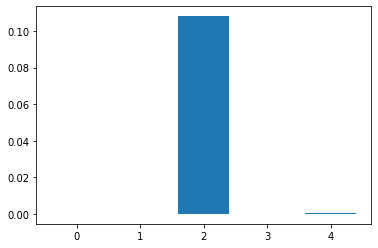

In [288]:
from matplotlib import pyplot
# get importance
importance = logmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [279]:
#predictions
Predictions = logmodel.predict(X_test)

In [280]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions,digits=4))

              precision    recall  f1-score   support

         0.0     0.8986    0.6258    0.7378    262913
         1.0     0.2234    0.6037    0.3261     46874

    accuracy                         0.6225    309787
   macro avg     0.5610    0.6148    0.5320    309787
weighted avg     0.7964    0.6225    0.6755    309787



In [256]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Predictions))

[[164543  98370]
 [ 18574  28300]]


In [233]:
import matplotlib.pyplot as plt

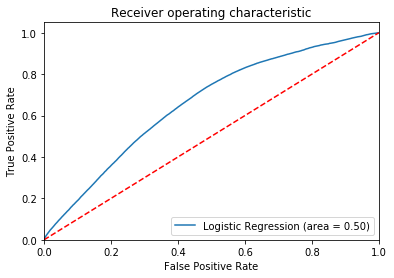

In [234]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, Predictions)
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#Adaboost

In [281]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=8),learning_rate=0.075,
    n_estimators=200
)
classifier.fit(os_data_X, os_data_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [294]:
#predictions = classifier.predict(test_X)
print(classification_report(test_y,y_pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.9524    0.9711    0.9617    315712
         1.0     0.8168    0.7267    0.7691     56032

    accuracy                         0.9342    371744
   macro avg     0.8846    0.8489    0.8654    371744
weighted avg     0.9320    0.9342    0.9326    371744



In [293]:
#Random Forest
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rand=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rand.fit(Xtrain_scale,os_data_y)

y_pred=rand.predict(Xtest_scale)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X_scale, y_scale, test_size = 0.3, random_state=1)

Feature: 0, Score: 0.17180
Feature: 1, Score: 0.17262
Feature: 2, Score: 0.32604
Feature: 3, Score: 0.26036
Feature: 4, Score: 0.06919


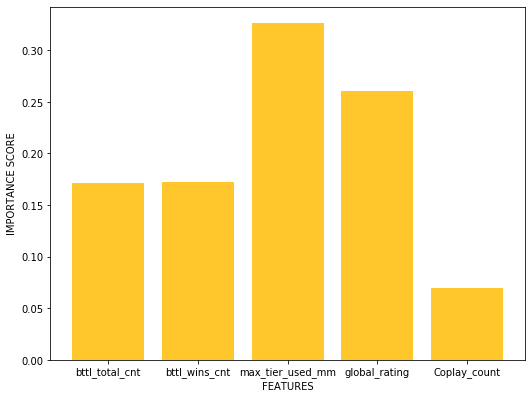

In [518]:
importance = rand.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar(features, importance,color='#FFC72C')
pyplot.xlabel('FEATURES')
pyplot.ylabel('IMPORTANCE SCORE')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5, 6.5,forward=True)
pyplot.show()

In [515]:
features = list(os_data_X.columns)
fi_model = pd.DataFrame({'feature': features,
                   'importance': rand.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [295]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Root Mean Squared Error: 0.2564324826261696


In [292]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xtrain_scale = scaler.fit_transform(os_data_X)
Xtest_scale = scaler.transform(test_X)


In [508]:
scaled_df = pd.DataFrame(Xtrain_scale, columns=['bttl_total_cnt', 'bttl_wins_cnt', 'max_tier_used_mm','global_rating','Coplay_count'])


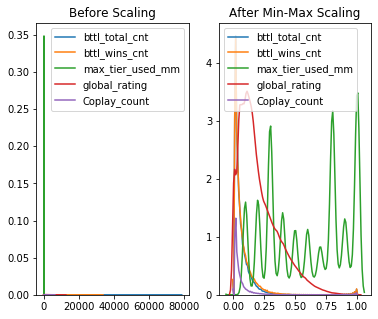

In [509]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(os_data_X['bttl_total_cnt'], ax=ax1)
sns.kdeplot(os_data_X['bttl_wins_cnt'], ax=ax1)
sns.kdeplot(os_data_X['max_tier_used_mm'], ax=ax1)
sns.kdeplot(os_data_X['global_rating'], ax=ax1)
sns.kdeplot(os_data_X['Coplay_count'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['bttl_total_cnt'], ax=ax2)
sns.kdeplot(scaled_df['bttl_wins_cnt'], ax=ax2)
sns.kdeplot(scaled_df['max_tier_used_mm'], ax=ax2)
sns.kdeplot(scaled_df['global_rating'], ax=ax2)
sns.kdeplot(scaled_df['Coplay_count'], ax=ax2)
plt.show()

In [506]:
os_data_X.head()

,bttl_total_cnt,bttl_wins_cnt,max_tier_used_mm,global_rating,Coplay_count
0,4.0,1.0,4.0,351.0,72.0
1,89.0,45.0,4.0,1768.0,72.0
2,5.0,3.0,3.0,2988.0,72.0
3,36.0,17.0,6.0,828.0,72.0
4,7.0,4.0,2.0,1047.0,72.0


In [ ]:
-randomforest
-xgboost
-LightGBM

EgoNetworks - basic stats

In [503]:
import networkx as nx
import seaborn as sns

In [315]:
coplay_edgelist = coplay_file.drop('BATTLE_CNT', axis =1)
coplay_edgelist = coplay_edgelist.drop_duplicates()
G = nx.from_pandas_edgelist(coplay_edgelist,'SPA1','SPA2')

In [502]:
twink_edgelist.head()

,PARENT_SPA_KEY,CHILD_SPA_KEY
0,658CDFD65103B78226828BA1EF405150A3615CF13DE410...,55250E954219DDB757D7FBD9AFB6FBB249EFAF69E9DE4A...
1,75CEA7828759FE157E838A4E8EE64190876AC50257825B...,35FE10DE6F56666254FC45D7B86D3793780723F68F53B6...
2,50B6FBDF2EEAA03BFC48BCBEF2E9AF55E12B87808C8213...,3C9B848EDF94730F264F5154DC3DEEE52315DC654F9381...
3,918AB7B7929DEBA24B8996D4D8B52D8532C6A0FC77FDAC...,22F853DC155D2F35D5EC495FE8254CE27356D75105604A...
4,305E76BA82F34E1E987839FFD856112C4F6FB3F2B514F7...,2B6E46A6F6A46F7145A3E08A7D00CDB038F3DA1FC7D9B3...


In [320]:
twink_edgelist = twinks_file.iloc[:,[1,3]]
twink_edgelist = twink_edgelist.drop_duplicates()
G_twink = nx.from_pandas_edgelist(twink_edgelist,'PARENT_SPA_KEY','CHILD_SPA_KEY')

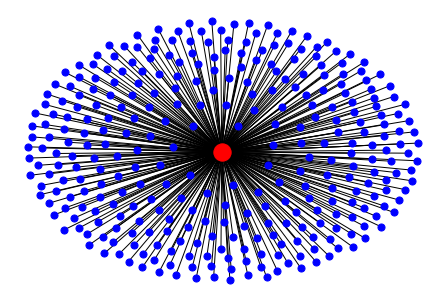

In [333]:
from operator import itemgetter

# find node with largest degree
node_and_degree = G_twink.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-3]
twink_ego = nx.ego_graph(G_twink, largest_hub)
# Draw graph
twink_pos = nx.spring_layout(twink_ego)
nx.draw(twink_ego, twink_pos, node_color='b', node_size=50, with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(twink_ego, twink_pos, nodelist=[largest_hub], node_size=300, node_color='r')
plt.show()

In [404]:
largest_hub

'5A7D2C239ADC1D04E1099A95893CFF3962934E708A4A860197B3ACC24E260BFA'

In [467]:
deg = nx.clustering(G, 'F0CFD1B23601FCE4994496675252FEE5AC4BDDABC075870EBB6CA581EF114E7F')
print(deg)

0.011066310589795954


In [394]:
coplay_spa = coplay_data.drop('Coplay_count', axis=1)
twink_commoncoplay = twink_edgelist.merge(coplay_spa, left_on='PARENT_SPA_KEY', right_on='SPA')
twink_commoncoplay = twink_commoncoplay.drop('SPA',axis=1)
twink_commoncoplay = twink_commoncoplay.merge(coplay_spa, left_on='CHILD_SPA_KEY', right_on='SPA')
twink_commoncoplay = twink_commoncoplay.drop('SPA',axis=1)

In [395]:
twink_commoncoplay.shape

(12835, 2)

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


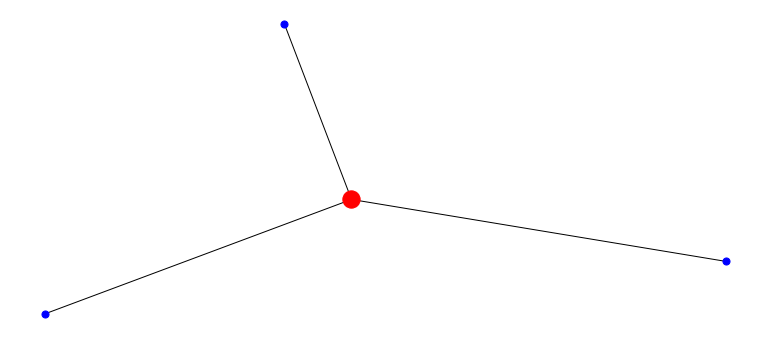

In [519]:
G_twinkcoplay = nx.from_pandas_edgelist(twink_commoncoplay,'PARENT_SPA_KEY','CHILD_SPA_KEY')
# find node with largest degree
node_and_degree = G_twinkcoplay.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-220]
twink_ego = nx.ego_graph(G_twinkcoplay, largest_hub)
# Draw graph
twink_pos = nx.spring_layout(twink_ego)
nx.draw(twink_ego, twink_pos, node_color='b', node_size=50, with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(twink_ego, twink_pos, nodelist=[largest_hub], node_size=300, node_color='r')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 4.5,forward=True)
plt.show()

In [403]:
list(twink_ego)

['5A7D2C239ADC1D04E1099A95893CFF3962934E708A4A860197B3ACC24E260BFA',
 'CB5EA0BB8A291545468093212330856B726A18310D36EF7DC7C3100A70643BC4',
 'F0CFD1B23601FCE4994496675252FEE5AC4BDDABC075870EBB6CA581EF114E7F',
 '57FDA19210A650030283651B5D024B8D753CD9CF72405E160DB29CE940DE7A1B']

In [411]:
#new df based on twink ego n/w
some_values = list(twink_ego)
new_coplay = coplay_edgelist.loc[coplay_edgelist['SPA1'].isin(some_values) | coplay_edgelist['SPA2'].isin(some_values) ]


In [436]:
twink_ego = nx.ego_graph(G, '57FDA19210A650030283651B5D024B8D753CD9CF72405E160DB29CE940DE7A1B')

In [437]:
nodes_coplay.append(list(twink_ego))

In [442]:
from collections import Iterable
def flatten(lis):
     for item in lis:
         if isinstance(item, Iterable) and not isinstance(item, str):
             for x in flatten(item):
                 yield x
         else:        
             yield item

In [443]:
nodes_coplay = list(flatten(nodes_coplay))

In [444]:
nodes_coplay

['F59306B4EAF296C3486AE3352CE06C0B3FF1B68EC6AFC52147F53EFF83C62573',
 '40D9604054430AF2D98C20A20E516BA93C63B4234779E19F6335FD04EEDFA248',
 '42BD7868E351C79A59A920A0072C71D776E94290CCFC413B7A698B18CB35E4C9',
 '4913249591963C1148100ECBB7350D20347A8201A1B55F845CEA6CAAA5360271',
 'E455E910A2A09553782A9DBD8BC7DFC5EF9C60679F25E3AB0E642F0F49DB877B',
 'EBDE822774A1CB33D8E780B26F89C1E9F793AE33F0503052971CA4B4983B6FE7',
 '4C4B9BB20D2824972DE188F8BD5E0ED5725CF64CFDD852DF5A7C9C6B5834D595',
 'F6F760D8B372740D073FC730A85F86EE608CAE4930AC3E84B02E3C040C35C67A',
 'D61AE938178EEAC806060BE7FE7974EFEADC7D2A724E64A70069A295F1F19925',
 '3A33C5F696D91C161F8A30100DAA1AF69F52226F069A177B11E0E1E342B77778',
 '482AA20BF5D05D99E9A696A124664CDE0B26EA1FECC1A8531848C9B31FB57C00',
 '1132BB43E91D148A7BC0F56D88FEC263273B266A54B4F513B18C40FCDDBC43A7',
 '87CB2CEFD2E78EBDC33159450204B484F0B0DFD4D5CD11A7B7A06A348C56C0E9',
 'F4B5E24F0F95FE3B5E4AAA5ECFD2E4BCF31B1C5304E6479F71A9E2945B2EEF71',
 'B36B11F019DECE663B2F3E85CDC7154A

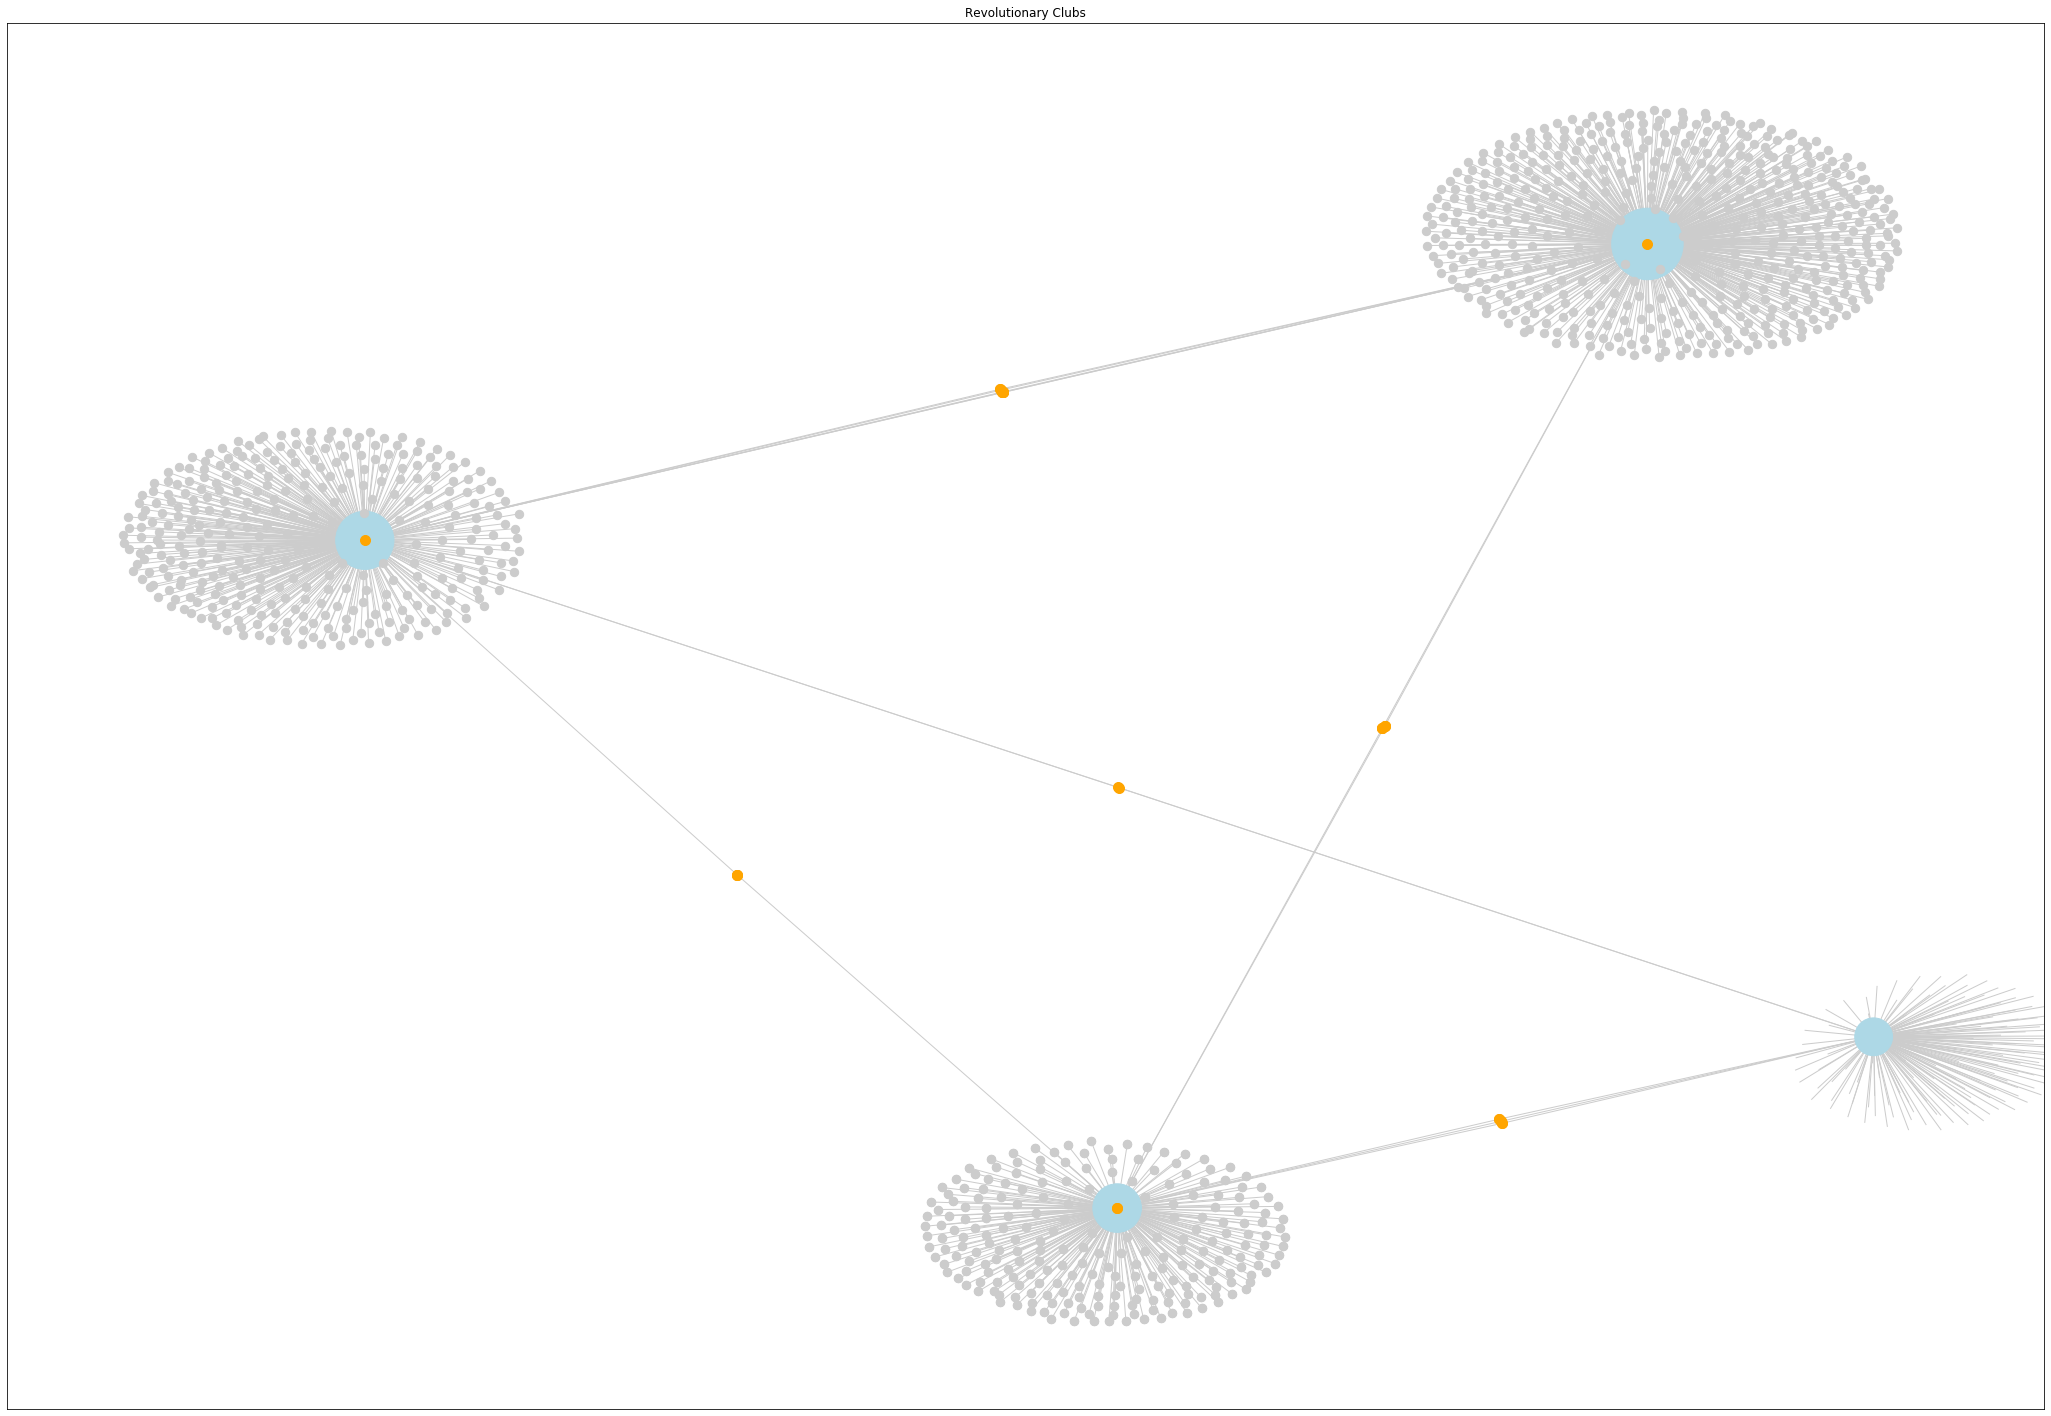

In [524]:
import matplotlib

#new coplay graph based on twink ego n/w
G_coplay = nx.from_pandas_edgelist(new_coplay,'SPA1','SPA2')
layout = nx.spring_layout(G_coplay,iterations=50)

# 3. Draw the parts we want
# Edges thin and grey
# People small and grey
# Clubs sized according to their number of connections
# Clubs blue
# Labels for clubs ONLY
# People who are highly connected are a highlighted color

# Go through every club name, ask the graph how many
# connections it has. Multiply that by 80 to get the circle size
some_values_size = [G_coplay.degree(some) * 10 for some in some_values]
nx.draw_networkx_nodes(G_coplay, 
                       layout, 
                       nodelist=some_values, 
                       node_size=some_values_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw EVERYONE
nx.draw_networkx_nodes(G_coplay, layout, nodelist=nodes_coplay, node_color='#cccccc', node_size=70)

# Draw POPULAR PEOPLE
popular_people = [person for person in nodes_coplay if G_coplay.degree(person) > 1]
nx.draw_networkx_nodes(G_coplay, layout, nodelist=popular_people, node_color='orange', node_size=100)

nx.draw_networkx_edges(G_coplay, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(some_values, some_values))
#nx.draw_networkx_labels(G_coplay, layout, labels=node_labels)

# 4. Turn off the axis because I know you don't want it
#plt.axis('off')

plt.title("Revolutionary Clubs")

# 5. Tell matplotlib to show it
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(36.5, 25.5,forward=True)

plt.show()

In [522]:
G_contracted = nx.contracted_nodes(G_contracted, '5A7D2C239ADC1D04E1099A95893CFF3962934E708A4A860197B3ACC24E260BFA', 'CB5EA0BB8A291545468093212330856B726A18310D36EF7DC7C3100A70643BC4', self_loops=False)


KeyboardInterrupt: 

In [479]:
deg = nx.clustering(G_contracted, '5A7D2C239ADC1D04E1099A95893CFF3962934E708A4A860197B3ACC24E260BFA')
print(deg)

0.013022525449426035
